# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
import os

## Importing the dataset

In [8]:
data = pd.read_csv(os.listdir()[-1])
data.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

## Splitting the dataset into the Training set and Test set

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = split(X, y, test_size= 0.2, random_state= 0)

## Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s, X_test_s = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

## Training the K-NN model on the Training set

In [89]:
neighbor = KNC(n_neighbors=8, 
    weights = 'uniform', 
    leaf_size=30, 
    p = 2)
neighbor.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=8)

## Predicting a new result

In [90]:
print(neighbor.predict(scaler.fit_transform([[30, 87_000]])))

[0]


## Predicting the Test set results

In [94]:
y_true = y_test
y_pred = neighbor.predict(scaler.fit_transform(X_test))
r2 = r2_score(y_true, y_pred).round(3)
combined = np.concatenate(
    (np.array(y_true).reshape(-1,1),
    np.array(y_pred).reshape(-1, 1)), axis = 1
)
cm_matrix_info = pd.DataFrame(
    [['True Negative', 'False Negative'], ['False Positive', 'True Positive']], 
    columns = ['Actual (False)', 'Actual (True)'], 
    index = ['Predicted (False)', 'Predicted (True)']
)

## Making the Confusion Matrix

In [95]:
cm = pd.DataFrame(
    confusion_matrix(y_true, y_pred), 
    columns = ['Actual (False)', 'Actual (True)'], 
    index = ['Predicted (False)', 'Predicted (True)']
)
accuracy = accuracy_score(y_true, y_pred).round(3)
display(cm_matrix_info)
print()
display(cm)
print('Accuracy Score: {}'.format(accuracy))
print(f'R-Squared: {r2}')

Actual (False)   Actual (True)
Predicted (False)   True Negative  False Negative
Predicted (True)   False Positive   True Positive

Actual (False)  Actual (True)
Predicted (False)              55              3
Predicted (True)                1             21

Accuracy Score: 0.95
R-Squared: 0.749


In [93]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Visualising the Training set results

c:\Users\bcr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


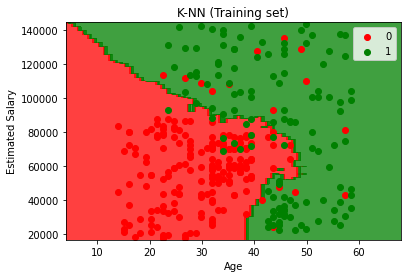

In [96]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train_s), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, neighbor.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


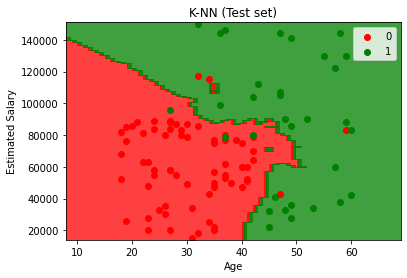

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()